<center><h1>EE69205: Signal Processing System Design</h1></center>
<center><h2>Exp-3: Denoising Speech Signal using Recursive Least Squares</h2></center>
<center><h3>Anirvan Krishna | 21EE38002<h3></center>

In [18]:
import numpy as np
import librosa as lb
import matplotlib.pyplot as plt
from scipy import signal

## Reading the Clean Speech Signal

Text(0, 0.5, 'Mel Frequency')

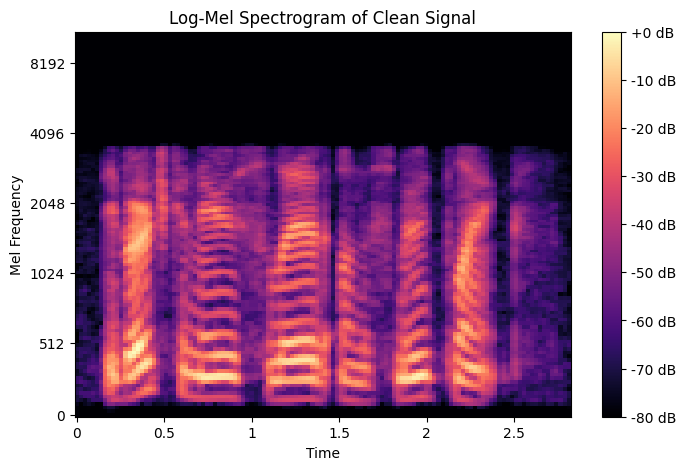

In [2]:
# Read the speech signal from file
file_path_clean = "clean\sp01.wav"
speech_signal_clean, sample_rate_clean = lb.load(file_path_clean)

# Compute the log-mel spectrogram
mel_spectrogram_clean = lb.feature.melspectrogram(y=speech_signal_clean, sr=sample_rate_clean, n_mels=128)

log_mel_spectrogram_clean = lb.power_to_db(mel_spectrogram_clean, ref=np.max)

# Plot the log-mel spectrogram
plt.figure(figsize=(8, 5), dpi=100)

lb.display.specshow(log_mel_spectrogram_clean, sr=sample_rate_clean,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of Clean Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

Text(0, 0.5, 'Signal Strength')

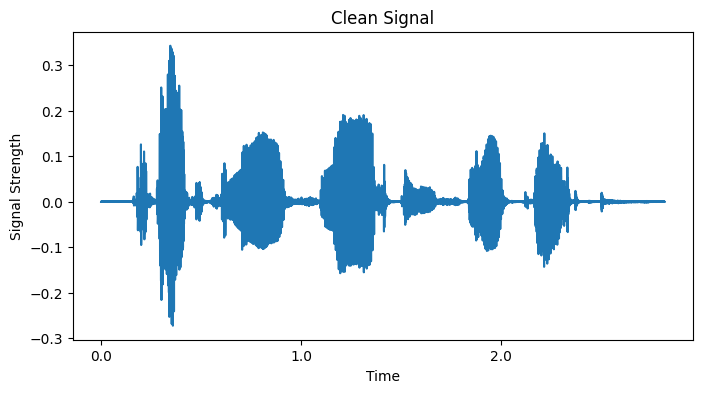

In [3]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(speech_signal_clean)), speech_signal_clean)
plt.title('Clean Signal')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

Text(0, 0.5, 'Mel Frequency')

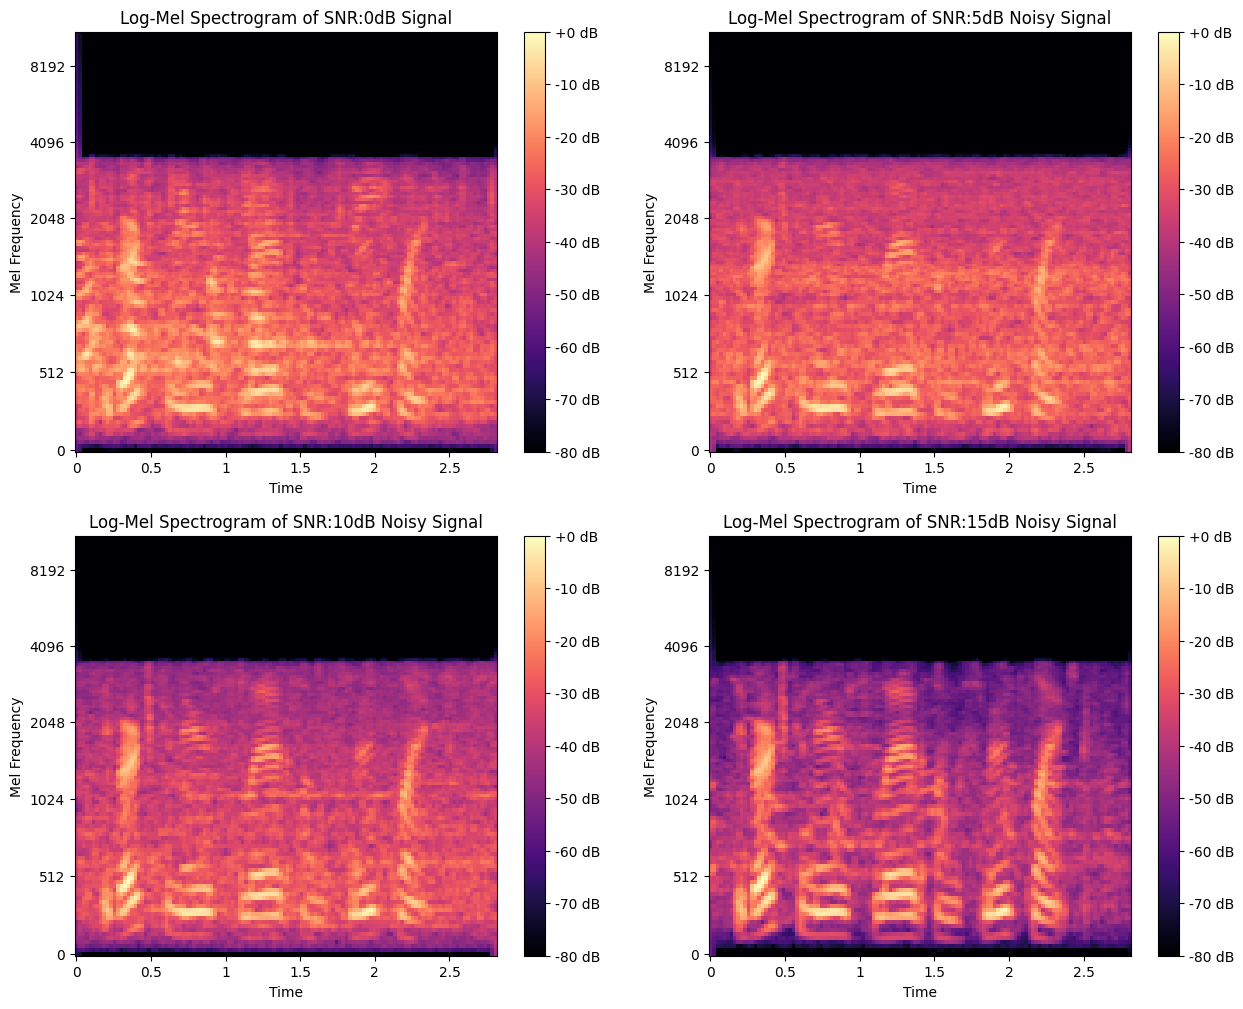

In [4]:
file_path_0dB = "station_0dB\sp01_station_sn0.wav"
speech_signal_0dB, sample_rate_0dB = lb.load(file_path_0dB)

# Compute the log-mel spectrogram
mel_spectrogram_0dB = lb.feature.melspectrogram(
    y=speech_signal_0dB, sr=sample_rate_0dB, n_mels=128)

log_mel_spectrogram_0dB = lb.power_to_db(mel_spectrogram_0dB, ref=np.max)

file_path_5dB = "station_5dB\sp01_station_sn5.wav"
speech_signal_5dB, sample_rate_5dB = lb.load(file_path_5dB)

# Compute the log-mel spectrogram
mel_spectrogram_5dB = lb.feature.melspectrogram(
    y=speech_signal_5dB, sr=sample_rate_5dB, n_mels=128)

log_mel_spectrogram_5dB = lb.power_to_db(mel_spectrogram_5dB, ref=np.max)

file_path_10dB = "station_10dB\sp01_station_sn10.wav"
speech_signal_10dB, sample_rate_10dB = lb.load(file_path_10dB)

# Compute the log-mel spectrogram
mel_spectrogram_10dB = lb.feature.melspectrogram(
    y=speech_signal_10dB, sr=sample_rate_10dB, n_mels=128)

log_mel_spectrogram_10dB = lb.power_to_db(mel_spectrogram_10dB, ref=np.max)

file_path_15dB = "station_15dB\sp01_station_sn15.wav"
speech_signal_15dB, sample_rate_15dB = lb.load(file_path_15dB)

# Compute the log-mel spectrogram
mel_spectrogram_15dB = lb.feature.melspectrogram(
    y=speech_signal_15dB, sr=sample_rate_15dB, n_mels=128)

log_mel_spectrogram_15dB = lb.power_to_db(mel_spectrogram_15dB, ref=np.max)


# Plot the log-mel spectrogram
plt.figure(figsize=(15, 12), dpi=100)

plt.subplot(2, 2, 1)
lb.display.specshow(log_mel_spectrogram_0dB, sr=sample_rate_0dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:0dB Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(2, 2, 2)
lb.display.specshow(log_mel_spectrogram_5dB, sr=sample_rate_5dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:5dB Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(2, 2, 3)
lb.display.specshow(log_mel_spectrogram_10dB, sr=sample_rate_10dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:10dB Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(2, 2, 4)
lb.display.specshow(log_mel_spectrogram_15dB, sr=sample_rate_15dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:15dB Noisy Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

Text(0, 0.5, 'Signal Strength')

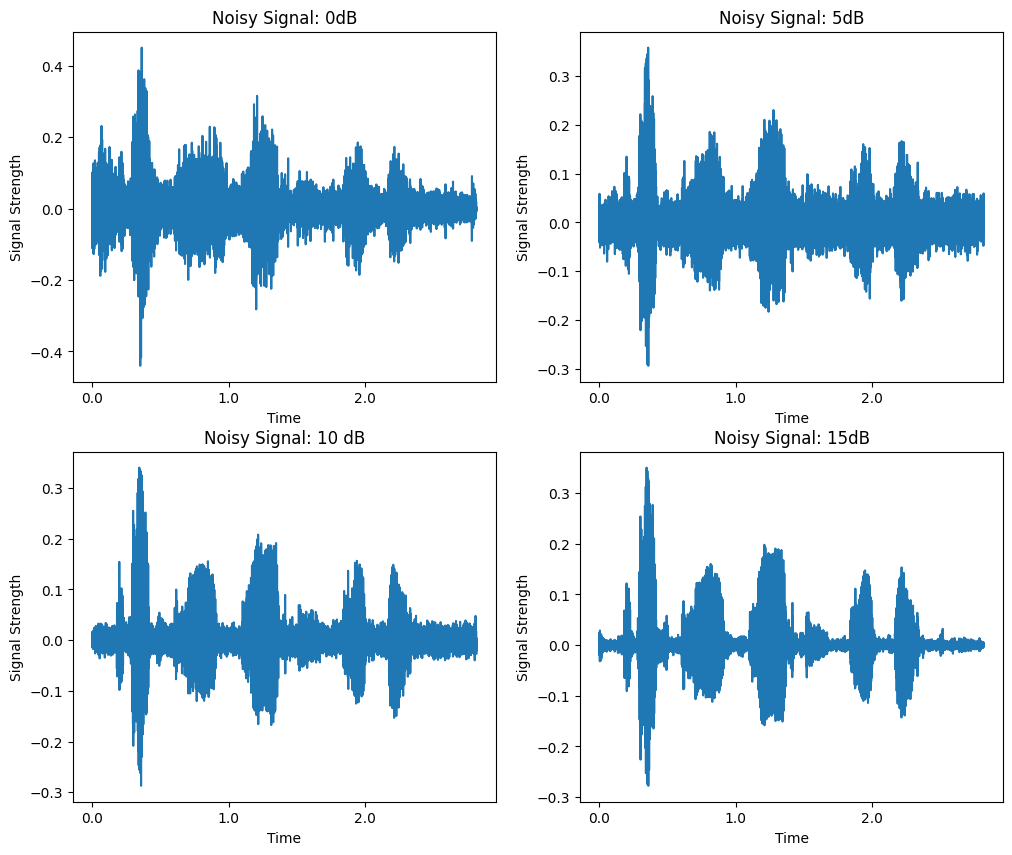

In [5]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(np.arange(len(speech_signal_clean)), speech_signal_0dB)
plt.title('Noisy Signal: 0dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

plt.subplot(2, 2, 2)
plt.plot(np.arange(len(speech_signal_clean)), speech_signal_5dB)
plt.title('Noisy Signal: 5dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

plt.subplot(2, 2, 3)
plt.plot(np.arange(len(speech_signal_clean)), speech_signal_10dB)
plt.title('Noisy Signal: 10 dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

plt.subplot(2, 2, 4)
plt.plot(np.arange(len(speech_signal_clean)), speech_signal_15dB)
plt.title('Noisy Signal: 15dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

## IIR Filtering: Low-Pass, High Pass and Band Pass

Butterworth filters are widely used in signal processing for their maximally flat frequency response in the passband, which means they do not have ripples. The frequency response of an n-th order Butterworth filter is defined as:

$$
|H(j\omega)| = \frac{1}{\sqrt{1 + \left(\frac{\omega}{\omega_c}\right)^{2n}}}
$$

where:
- $ \omega_c $ is the cutoff frequency,
- $ n $ is the order of the filter.

### 1. Low-Pass Butterworth Filter

A Low-Pass Butterworth filter allows frequencies below the cutoff frequency $ \omega_c $ to pass while attenuating frequencies above $ \omega_c $.

#### Frequency Response:
$$
|H_{LP}(j\omega)| = \frac{1}{\sqrt{1 + \left(\frac{\omega}{\omega_c}\right)^{2n}}}
$$

### 2. High-Pass Butterworth Filter

A High-Pass Butterworth filter allows frequencies above the cutoff frequency $ \omega_c $ to pass while attenuating frequencies below $ \omega_c $.

#### Frequency Response:
$$
|H_{HP}(j\omega)| = \frac{1}{\sqrt{1 + \left(\frac{\omega_c}{\omega}\right)^{2n}}}
$$

### 3. Bandpass Butterworth Filter

A Bandpass Butterworth filter allows frequencies within a certain range (between $ \omega_1 $ and $ \omega_2 $) to pass while attenuating frequencies outside this rang$$

#### Frequency Response:
$$
|H_{BP}(j\omega)| = \frac{1}{\sqrt{1 + \left(\frac{\omega^2 - \omega_1\omega_2}{\omega(\omega_2 - \omega_1)}\right)^{2n}}}
$$

### Filter Design Steps

1. **Choose the filter type**: Low-Pass, High-Pass, or Bandpass.
2. **Determine the order** $ n $ based on the desired roll-off.
3. **Calculate the cutoff frequencies** $ \omega_c $ for Low/High-Pass or $ \omega_1 $ and $ \omega_2 $ for Bandpass.
4. **Design the filter** using the corresponding transfer function.


In [70]:
def lowpass_filter(signal_data, cutoff_freq, fs, order=5):
    nyquist = 0.5 * fs
    normalized_cutoff = cutoff_freq / nyquist

    # IIR filter (Butterworth)
    iir_b, iir_a = signal.butter(order, normalized_cutoff, btype='low')
    iir_filtered_signal = signal.lfilter(iir_b, iir_a, signal_data)

    return iir_filtered_signal


def highpass_filter(signal_data, cutoff_freq, fs, order=5):
    nyquist = 0.5 * fs
    normalized_cutoff = cutoff_freq / nyquist

    # IIR filter (Butterworth)
    iir_b, iir_a = signal.butter(order, normalized_cutoff, btype='high')
    iir_filtered_signal = signal.lfilter(iir_b, iir_a, signal_data)

    return iir_filtered_signal


def bandpass_filter(signal_data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    normalized_lowcut = lowcut / nyquist
    normalized_highcut = highcut / nyquist

    # IIR filter (Butterworth)
    iir_b, iir_a = signal.butter(
        order, [normalized_lowcut, normalized_highcut], btype='band')
    iir_filtered_signal = signal.lfilter(iir_b, iir_a, signal_data)

    return iir_filtered_signal

In [91]:
def apply_filters(clean_signal, noisy_signal, fs, cutoff_freq_low, cutoff_freq_high, filter_type):
    
    if filter_type == 'lowpass':
        # Apply low-pass filter
        filtered_signal = lowpass_filter(noisy_signal, cutoff_freq_low, fs)
    elif filter_type == 'highpass':
        # Apply high-pass filter
        filtered_signal = highpass_filter(noisy_signal, cutoff_freq_high, fs)
    elif filter_type == 'bandpass':
        # Apply band-pass filter
        filtered_signal = bandpass_filter(noisy_signal, cutoff_freq_low, cutoff_freq_high, fs)
    else:
        print("Invalid filter type")
        return

    # Compute the log-mel spectrogram of the noisy signal
    mel_spectrogram_noisy = lb.feature.melspectrogram(y=noisy_signal, sr=fs, n_mels=128)
    log_mel_spectrogram_noisy = lb.power_to_db(mel_spectrogram_noisy, ref=np.max)

    # Compute mean squared error
    mse_noisy = np.mean((clean_signal - noisy_signal)**2)
    mse_filtered = np.mean((clean_signal - filtered_signal)**2)
    
    # Compute the log-mel spectrogram of the filtered signal
    mel_spectrogram_filtered = lb.feature.melspectrogram(y=filtered_signal, sr=fs, n_mels=128)
    log_mel_spectrogram_filtered = lb.power_to_db(mel_spectrogram_filtered, ref=np.max)

    # Plot the signals and spectrograms
    plt.figure(figsize=(20, 10))
    
    # Time domain plot
    plt.subplot(2, 3, 1)
    plt.plot(clean_signal, label='Clean Signal')
    plt.xlabel('Time')
    plt.ylabel('Signal Amplitude')
    plt.title('Clean Signal')
    
    plt.subplot(2, 3, 2)
    plt.plot(noisy_signal, label='Noisy Signal')
    plt.xlabel('Time')
    plt.ylabel('Signal Amplitude')
    plt.title('Noisy Signal')

    plt.subplot(2, 3, 3)
    plt.plot(filtered_signal, label=f'{filter_type.capitalize()} Filtered Signal')
    plt.xlabel('Time')
    plt.ylabel('Signal Amplitude')
    plt.title(f'FIR Filtered Signal')
    
    # Log-mel spectrogram of the clean signal
    plt.subplot(2, 3, 4)
    lb.display.specshow(log_mel_spectrogram_clean, sr=sample_rate_clean,
                        x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Mel Spectrogram of Clean Signal')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    
    # Log-mel spectrogram of the filtered signal
    plt.subplot(2, 3, 6)
    lb.display.specshow(log_mel_spectrogram_filtered, sr=sample_rate_clean,
                        x_axis='time', y_axis='mel')

    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-Mel Spectrogram of Filtered Signal')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    
    # Log-mel spectrogram of the noisy signal
    plt.subplot(2, 3, 5)
    lb.display.specshow(log_mel_spectrogram_noisy, sr=sample_rate_clean,
                        x_axis='time', y_axis='mel')

    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-Mel Spectrogram of Noisy Signal')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    
    plt.tight_layout()
    plt.show()

    # Print mean squared error
    print(
        f"MSE original and noisy signal: {mse_noisy}")
    print(
        f"MSE original {filter_type.capitalize()} filtered signal: {mse_filtered}")

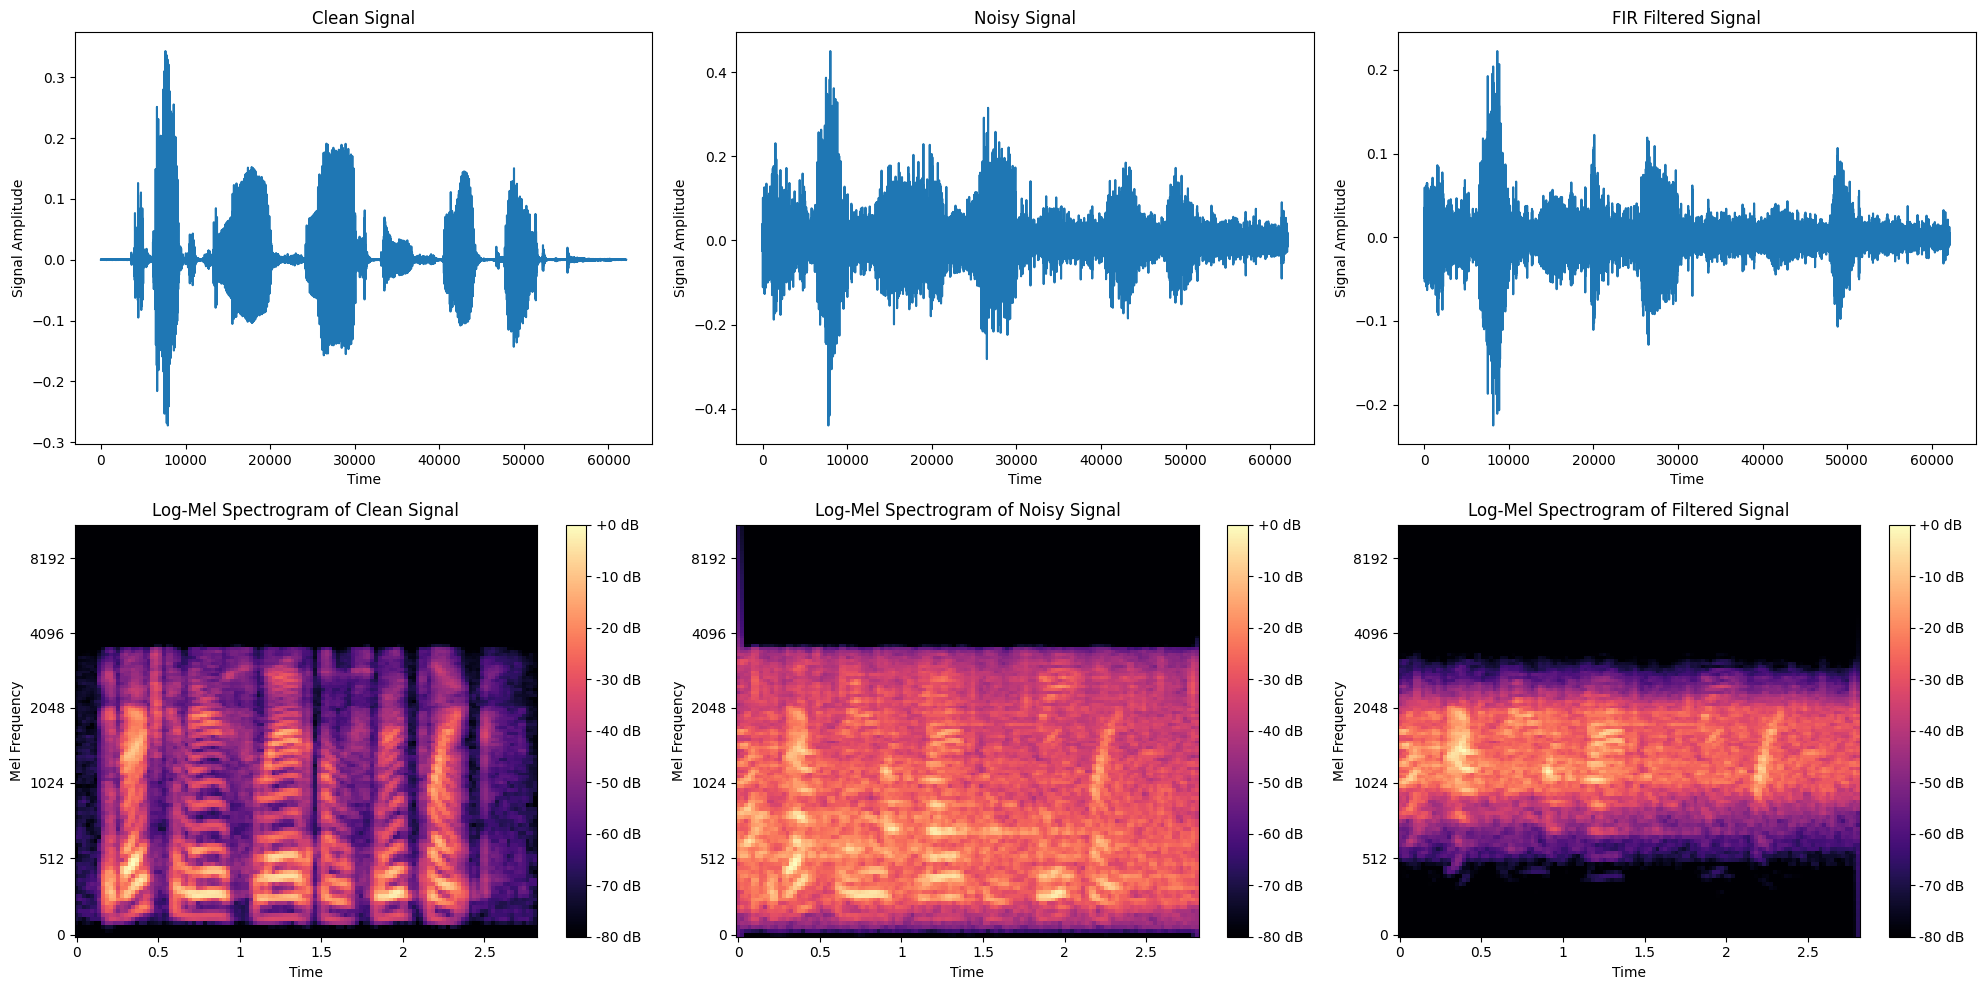

MSE original and noisy signal: 0.0013656532391905785
MSE original Bandpass filtered signal: 0.0015292776294588343


In [92]:
apply_filters(clean_signal=speech_signal_clean, noisy_signal = speech_signal_0dB, fs = sample_rate_clean,
              cutoff_freq_low = 1024, cutoff_freq_high = 2048, filter_type = 'bandpass')

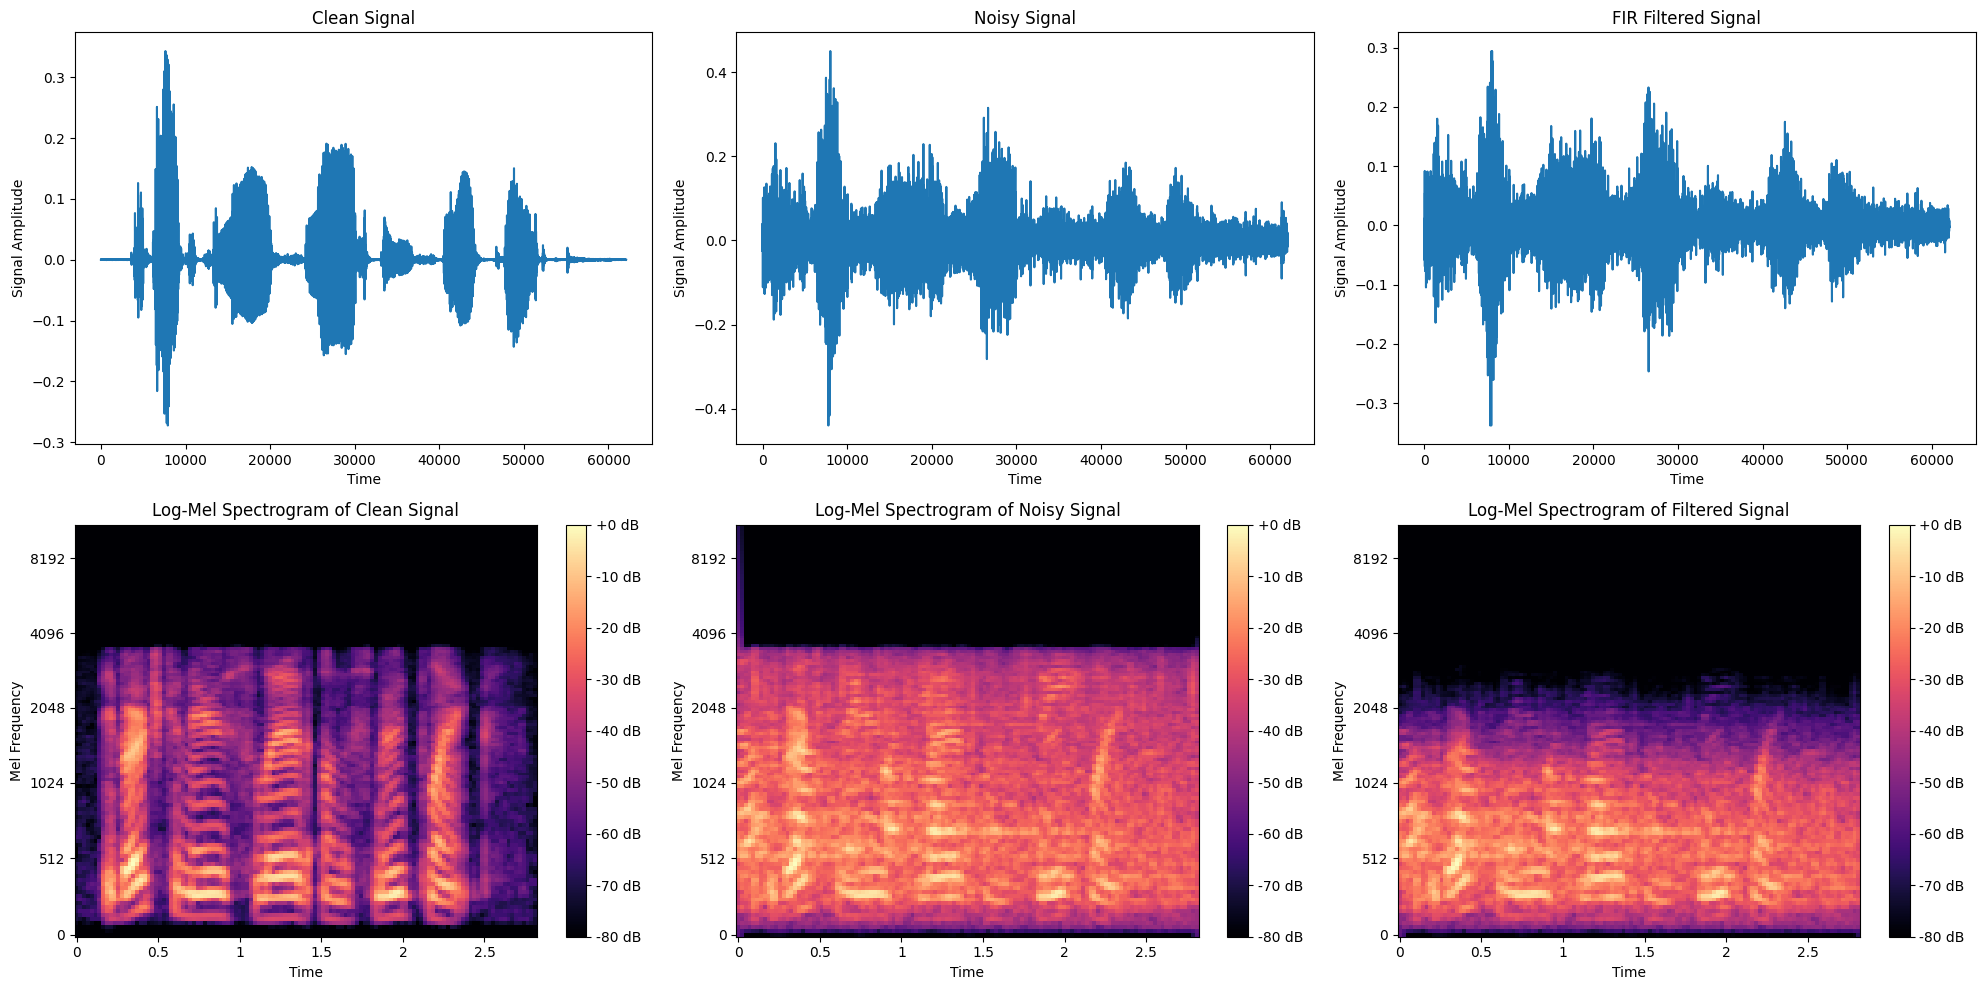

MSE original and noisy signal: 0.0013656532391905785
MSE original Lowpass filtered signal: 0.0025795033748875922


In [93]:
apply_filters(clean_signal=speech_signal_clean, noisy_signal=speech_signal_0dB, fs=sample_rate_clean,
              cutoff_freq_low=1024, cutoff_freq_high=2048, filter_type='lowpass')

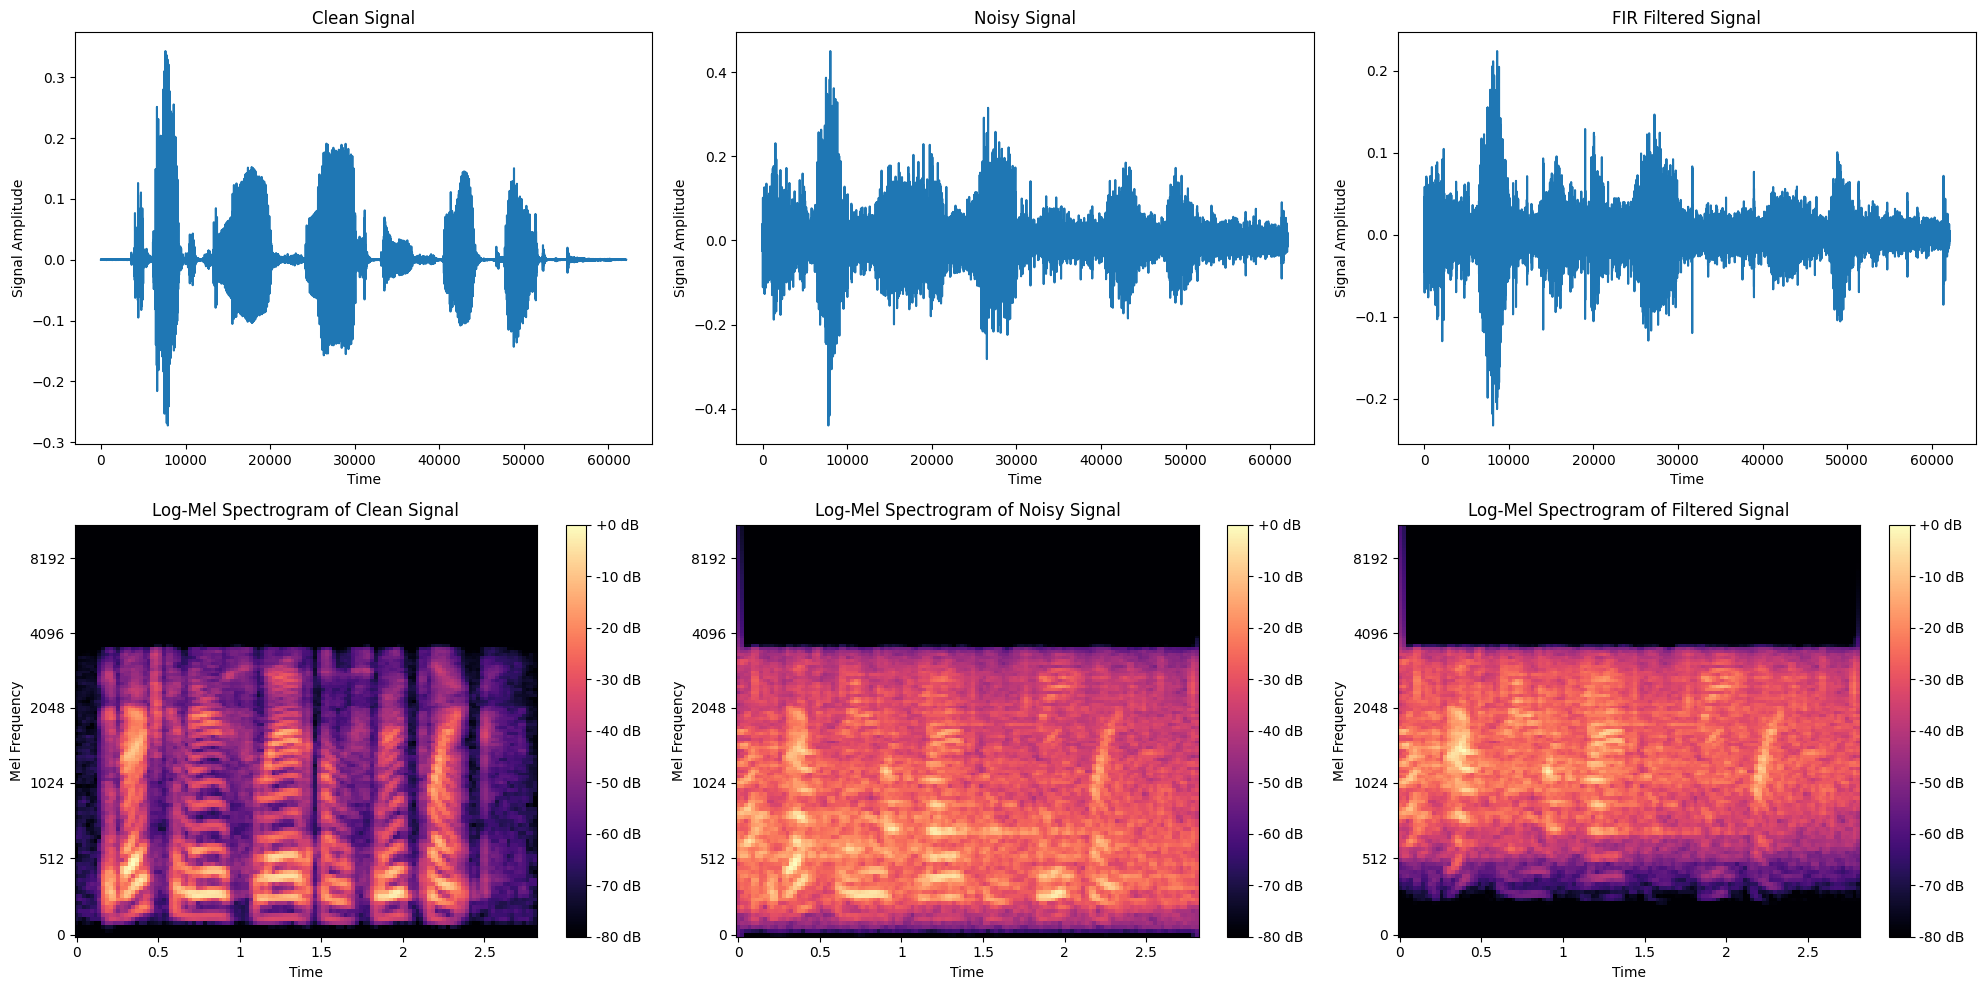

MSE original and noisy signal: 0.0013656532391905785
MSE original Highpass filtered signal: 0.0020165881112008377


In [96]:
apply_filters(clean_signal=speech_signal_clean, noisy_signal=speech_signal_0dB, fs=sample_rate_clean,
              cutoff_freq_low=512, cutoff_freq_high=1024, filter_type='highpass')

## Recursive Least Squares and Error Signal Estimation

Implementation Steps: 


1. Initialize filter coefficients: $ W[0] = 0 $
2. Initialize inverse correlation matrix: $ R[0] = I $ (Identity matrix)
3. Set forgetting factor: $ \lambda $
4. For each sample: $ n $ from $ M $ to $ N $ do
   1. Extract input vector $$ X[n] = [x[n − 1], x[n − 2], \dots, x[n − M]]^T $$
   2. Compute estimated output $$ \hat{d}[n] = W[n − 1]^T \cdot X[n] $$
   3. Compute estimation error $$ e[n] = d[n] − \hat{d}[n] $$
   4. Compute Kalman gain $$ K[n] = \frac{R[n−1] \cdot X[n]}{\lambda + X[n]^T \cdot R[n−1] \cdot X[n]} $$
   5. Update filter coefficients $$ W[n] = W[n − 1] + K[n] \cdot e[n] $$
   6. Update inverse correlation matrix $$ R[n] = \frac{1}{\lambda} $$


In [9]:
def recursive_least_square_filter(x, d, order, delta=1.0, lambda_=0.99):
    """
    Recursive Least Squares (RLS) filter.
    
    Parameters:
    x : array-like
        Input signal.
    d : array-like
        Desired signal.
    order : int
        Order of the filter.
    delta : float, optional
        Initial value for the inverse correlation matrix. Default is 1.0.
    lambda_ : float, optional
        Forgetting factor. Default is 0.99.
    
    Returns:
    y : array-like
        Output signal.
    e : array-like
        Error signal.
    w : array-like
        Filter coefficients.
    """
    n_samples = len(x)
    w = np.zeros(order)
    P = np.eye(order) * delta
    y = np.zeros(n_samples)
    e = np.zeros(n_samples)

    for n in range(order, n_samples):
        X = x[n-order:n][::-1]  # Input vector of length 'order'
        y[n] = np.dot(w, X)
        e[n] = d[n] - y[n]
        k = P @ X / (lambda_ + X.T @ P @ X)
        w += k * e[n]
        P = (P - np.outer(k, X.T @ P)) / lambda_

    return y, e, w

### 0dB SNR Signal

MSE original and filtered signal: 0.0003790184823521853
MSE original and Noisy signal: 0.0013656532391905785


Text(0, 0.5, 'Mel Frequency')

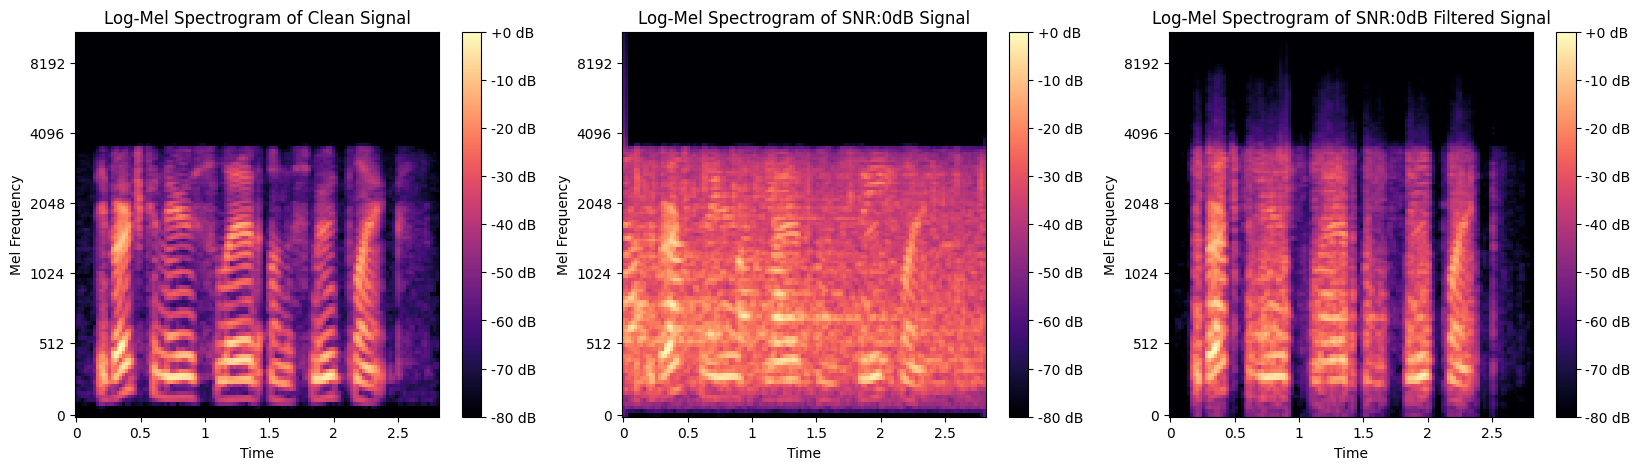

In [10]:
cleaned_signal_0dB, error, _ = recursive_least_square_filter(x=speech_signal_0dB, d=speech_signal_clean, order=4)

# Compute the log-mel spectrogram
mel_spectrogram_0dB_filtered = lb.feature.melspectrogram(
    y=cleaned_signal_0dB, sr=sample_rate_0dB, n_mels=128)

log_mel_spectrogram_0dB_filtered = lb.power_to_db(mel_spectrogram_0dB_filtered, ref=np.max)

print(f"MSE original and filtered signal: {np.mean((error)**2)}")
print(f"MSE original and Noisy signal: {np.mean((speech_signal_clean - speech_signal_0dB)**2)}")


# Plot the log-mel spectrogram
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
lb.display.specshow(log_mel_spectrogram_clean, sr=sample_rate_clean,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of Clean Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(1, 3, 2)
lb.display.specshow(log_mel_spectrogram_0dB, sr=sample_rate_0dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:0dB Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(1, 3, 3)
lb.display.specshow(log_mel_spectrogram_0dB_filtered, sr=sample_rate_0dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:0dB Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

Text(0, 0.5, 'Signal Strength')

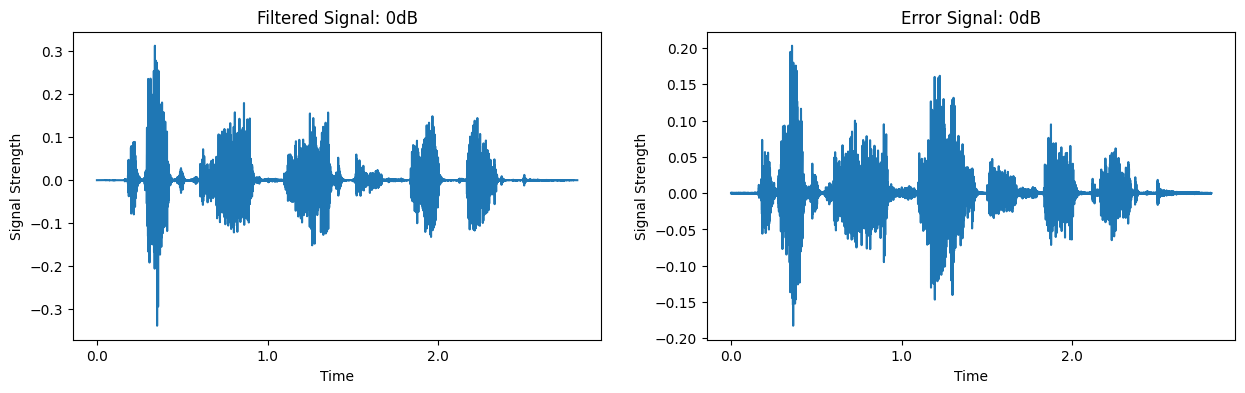

In [11]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(speech_signal_clean)), cleaned_signal_0dB)
plt.title('Filtered Signal: 0dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(speech_signal_clean)), error)
plt.title('Error Signal: 0dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

### 5dB SNR

MSE original and filtered signal: 0.00013710357381343572
MSE original and Noisy signal: 0.000431862601544708


Text(0, 0.5, 'Mel Frequency')

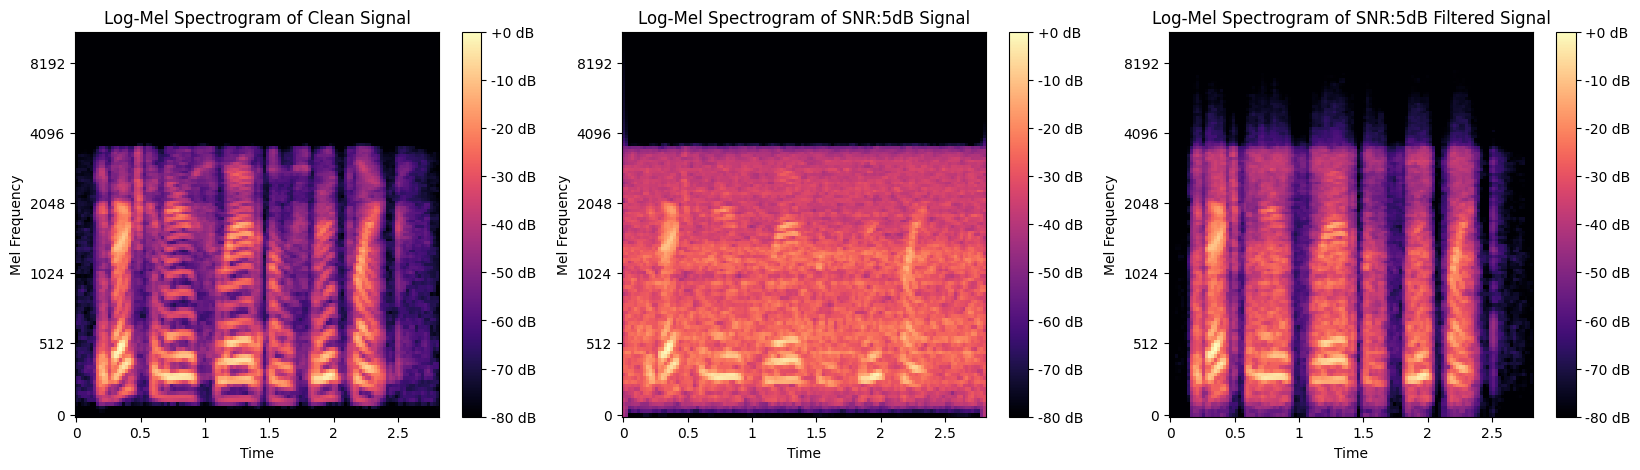

In [12]:
cleaned_signal_5dB, error, _ = recursive_least_square_filter(
    x=speech_signal_5dB, d=speech_signal_clean, order=4)

# Compute the log-mel spectrogram
mel_spectrogram_5dB_filtered = lb.feature.melspectrogram(
    y=cleaned_signal_5dB, sr=sample_rate_5dB, n_mels=128)

log_mel_spectrogram_5dB_filtered = lb.power_to_db(
    mel_spectrogram_5dB_filtered, ref=np.max)

print(f"MSE original and filtered signal: {np.mean((error)**2)}")
print(
    f"MSE original and Noisy signal: {np.mean((speech_signal_clean - speech_signal_5dB)**2)}")


# Plot the log-mel spectrogram
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
lb.display.specshow(log_mel_spectrogram_clean, sr=sample_rate_clean,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of Clean Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(1, 3, 2)
lb.display.specshow(log_mel_spectrogram_5dB, sr=sample_rate_5dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:5dB Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(1, 3, 3)
lb.display.specshow(log_mel_spectrogram_5dB_filtered, sr=sample_rate_5dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:5dB Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

Text(0, 0.5, 'Signal Strength')

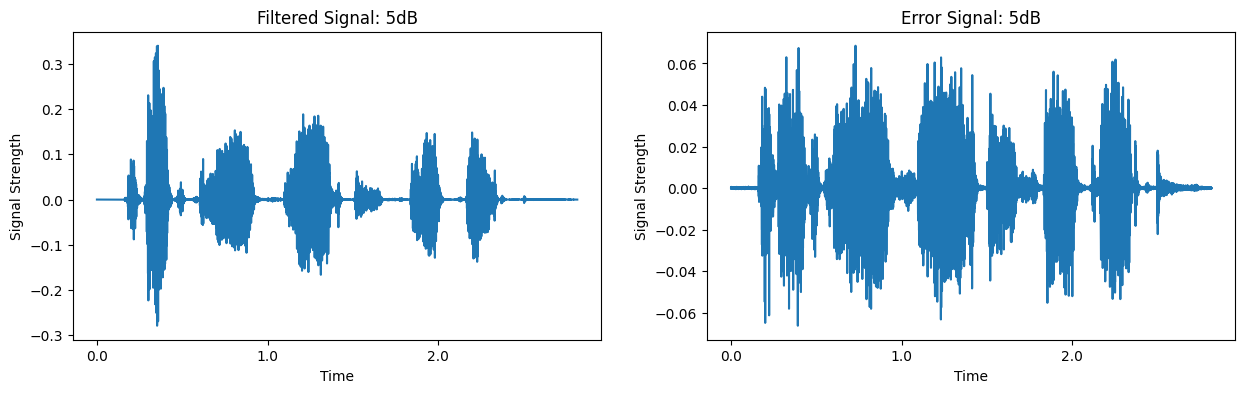

In [13]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(speech_signal_clean)), cleaned_signal_5dB)
plt.title('Filtered Signal: 5dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(speech_signal_clean)), error)
plt.title('Error Signal: 5dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

### 10 dB SNR

MSE original and filtered signal: 5.299050367396729e-05
MSE original and Noisy signal: 0.00013656845840159804


Text(0, 0.5, 'Mel Frequency')

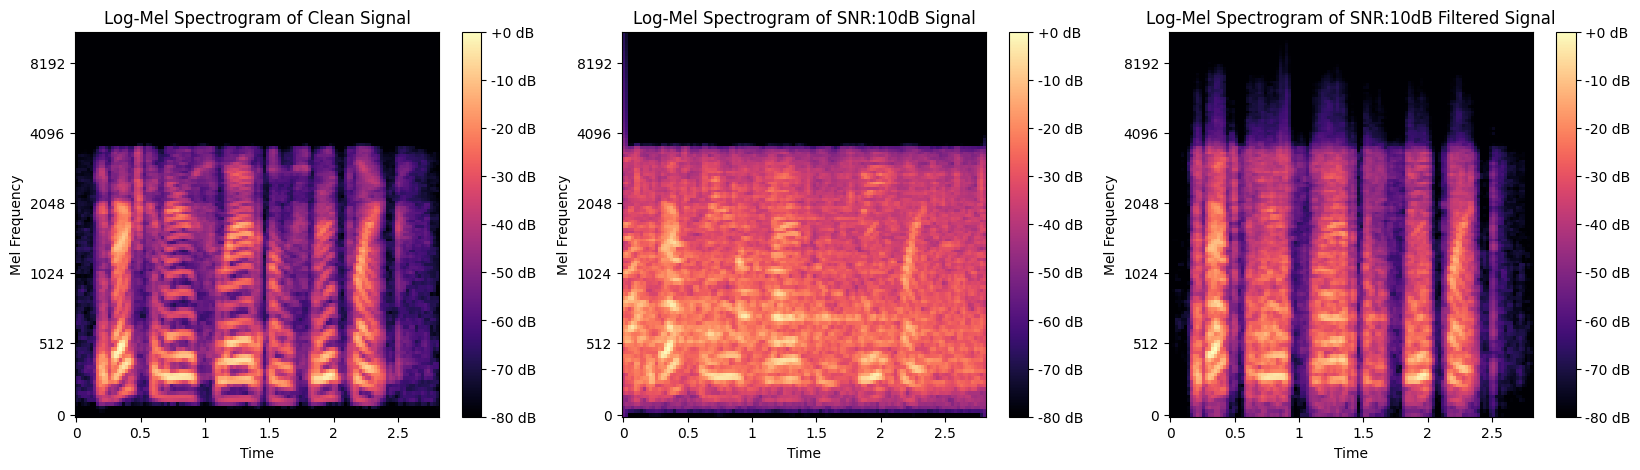

In [14]:
cleaned_signal_10dB, error, _ = recursive_least_square_filter(
    x=speech_signal_10dB, d=speech_signal_clean, order=4)

# Compute the log-mel spectrogram
mel_spectrogram_10dB_filtered = lb.feature.melspectrogram(
    y=cleaned_signal_10dB, sr=sample_rate_10dB, n_mels=128)

log_mel_spectrogram_10dB_filtered = lb.power_to_db(
    mel_spectrogram_10dB_filtered, ref=np.max)

print(f"MSE original and filtered signal: {np.mean((error)**2)}")
print(
    f"MSE original and Noisy signal: {np.mean((speech_signal_clean - speech_signal_10dB)**2)}")


# Plot the log-mel spectrogram
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
lb.display.specshow(log_mel_spectrogram_clean, sr=sample_rate_clean,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of Clean Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(1, 3, 2)
lb.display.specshow(log_mel_spectrogram_0dB, sr=sample_rate_0dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:10dB Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(1, 3, 3)
lb.display.specshow(log_mel_spectrogram_0dB_filtered, sr=sample_rate_0dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:10dB Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

Text(0, 0.5, 'Signal Strength')

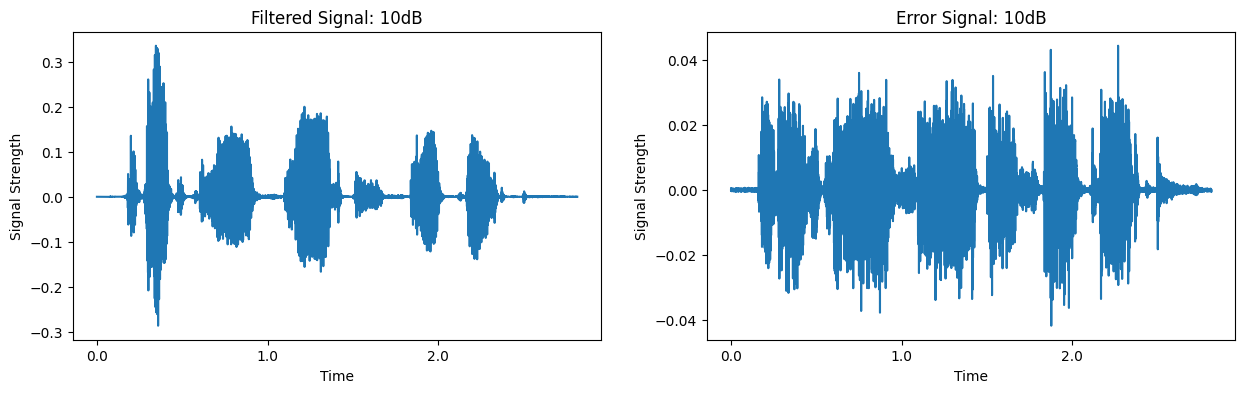

In [15]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(speech_signal_clean)), cleaned_signal_10dB)
plt.title('Filtered Signal: 10dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(speech_signal_clean)), error)
plt.title('Error Signal: 10dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

### 15dB SNR

MSE original and filtered signal: 2.4688934438946503e-05
MSE original and Noisy signal: 4.318367427913472e-05


Text(0, 0.5, 'Mel Frequency')

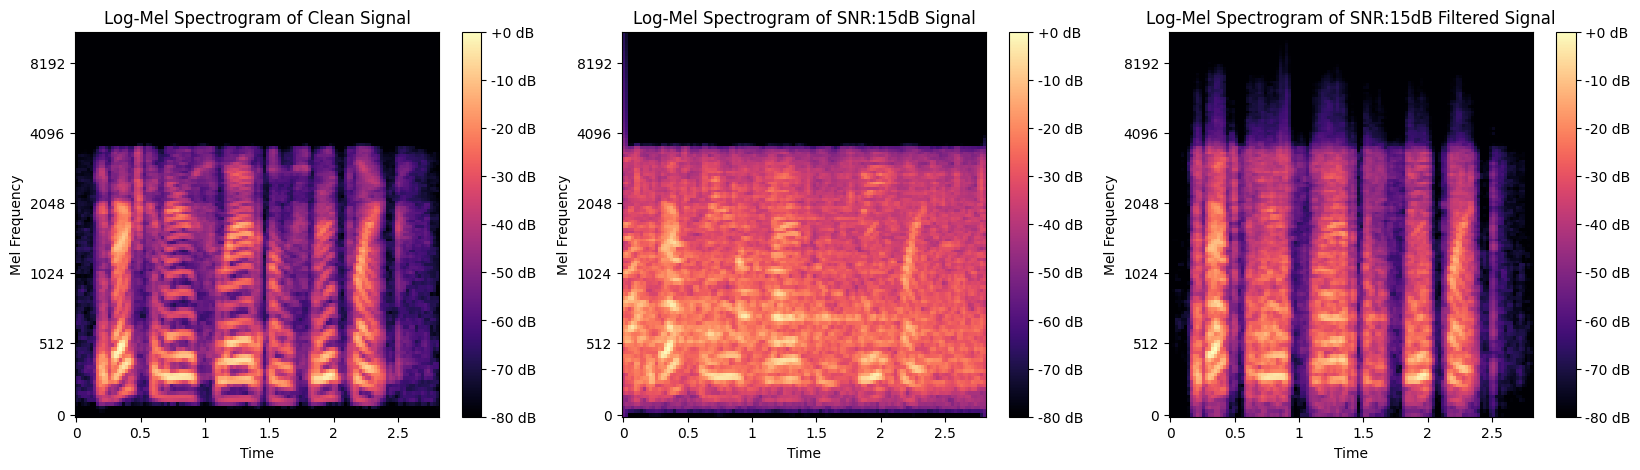

In [16]:
cleaned_signal_15dB, error, _ = recursive_least_square_filter(
    x=speech_signal_15dB, d=speech_signal_clean, order=4)

# Compute the log-mel spectrogram
mel_spectrogram_15dB_filtered = lb.feature.melspectrogram(
    y=cleaned_signal_15dB, sr=sample_rate_15dB, n_mels=128)

log_mel_spectrogram_15dB_filtered = lb.power_to_db(
    mel_spectrogram_15dB_filtered, ref=np.max)

print(f"MSE original and filtered signal: {np.mean((error)**2)}")
print(
    f"MSE original and Noisy signal: {np.mean((speech_signal_clean - speech_signal_15dB)**2)}")


# Plot the log-mel spectrogram
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
lb.display.specshow(log_mel_spectrogram_clean, sr=sample_rate_clean,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of Clean Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(1, 3, 2)
lb.display.specshow(log_mel_spectrogram_0dB, sr=sample_rate_0dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:15dB Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

plt.subplot(1, 3, 3)
lb.display.specshow(log_mel_spectrogram_0dB_filtered, sr=sample_rate_0dB,
                    x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Mel Spectrogram of SNR:15dB Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Mel Frequency')

Text(0, 0.5, 'Signal Strength')

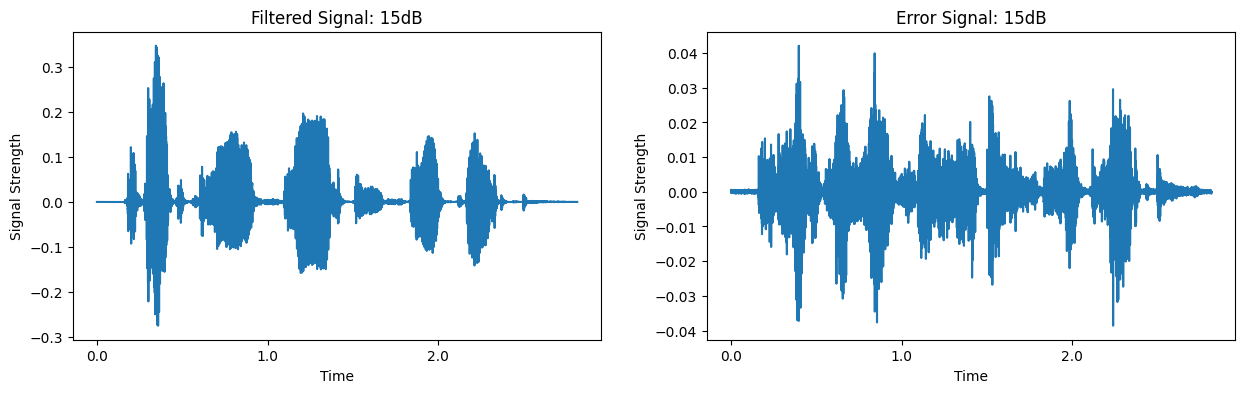

In [17]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(np.arange(len(speech_signal_clean)), cleaned_signal_15dB)
plt.title('Filtered Signal: 15dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(speech_signal_clean)), error)
plt.title('Error Signal: 15dB')
plt.xlabel('Time')
plt.xticks(np.arange(0, len(speech_signal_clean), sample_rate_clean),
           labels=np.arange(0, len(speech_signal_clean) / sample_rate_clean, 1))

plt.ylabel('Signal Strength')